# Titanic - Machine Learning from Disaster
*Predict survival on the Titanic and get familiar with ML basics*

### Imports

In [2090]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetics for the plots
sns.set(style="whitegrid", palette="muted")

RANDOM_STATE = 101

### Data collection

In [2091]:
df_train = pd.read_csv("./data/train.csv")
pd.concat([df_train.head(2), df_train.tail(2)])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### Data description

**Fields**
- `PassengerId`: Unique identification of the passenger.
- `Survived`: Survival (0 = No, 1 = Yes). **Target variable**.
- `Pclass`: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
- `Name`: Name of the passenger.
- `Sex`: Sex.
- `Age`: Age in years.
- `SibSp`: # of siblings / spouses aboard the Titanic.
- `Parch`: # of parents / children aboard the Titanic.
- `Ticket`: Ticket number.
- `Fare`: Passenger fare.
- `Cabin`: Cabin number.
- `Embarked`: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

**Titles**

- `Mrs`: Married woman.
- `Mr`: Adult male.
- `Master`: Young boy, typically under 12 years old.
- `Miss`: Unmarried woman or girl.
- `Major`: Military rank.
- `Rev`: Reverend, a title used for members of the clergy.
- `Dr`: Doctor, medical professional or Ph.D. holder.
- `Ms`: Gender-neutral title for a woman, regardless of marital status.
- `Mlle`: Mademoiselle, French for an unmarried woman (similar to Miss).
- `Col`: Colonel, a senior military officer.
- `Capt`: Captain, a high-ranking military officer or ship captain.
- `Mme`: Madame, French for a married woman.
- `Countess`: Noble title for a woman.
- `Don`: Title of nobility or respect, used in Spanish, Italian, and Portuguese for a man.
- `Jonkheer`: Dutch honorific for nobility without a specific title.
- `Lady`: A title used for women of noble rank or high social status
- `Sir`: A title of honor or respect for a man.

### Read Functions

In [2092]:
def show_missing_data(df):
    """
    Display number and percentage of missing values in all columns
    """
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (
        ((df.isnull().sum() / df.isnull().count()) * 100)
        .sort_values(ascending=False)
        .round(2)
    )
    missing_data = pd.concat([total, percent], axis=1, keys=["# missing", "% missing"])
    print(missing_data)

### Exploratory Data Analysis

In [2093]:
# display dataframe info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2094]:
# display number and percentage of missing values
show_missing_data(df_train)

             # missing  % missing
Cabin              687      77.10
Age                177      19.87
Embarked             2       0.22
PassengerId          0       0.00
Survived             0       0.00
Pclass               0       0.00
Name                 0       0.00
Sex                  0       0.00
SibSp                0       0.00
Parch                0       0.00
Ticket               0       0.00
Fare                 0       0.00


In [2095]:
# show values and count for field 'Embarked' -> 'S' to be used for NaN values
df_train["Embarked"].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [2096]:
# show average age per class -> mean() to be used for NaN age based on Pclass (based on correlation)
df_train.groupby("Pclass")["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [2097]:
# show survival by fare ranges
pd.crosstab(pd.cut(df_train['Fare'], bins=range(0, 500, 50)), df_train["Survived"])

Survived,0,1
Fare,,
"(0, 50]",484,232
"(50, 100]",37,70
"(100, 150]",5,19
"(150, 200]",3,6
"(200, 250]",4,7
"(250, 300]",2,4


### Data cleaning & Preprocessing

In [2098]:
# update null values on Age based on Pclass mean
mean_age_per_class = df_train.groupby("Pclass")["Age"].transform("mean")
df_train["Age"] = df_train["Age"].fillna(mean_age_per_class)

In [2099]:
# show survival by groups of age -> new feature to be created
pd.crosstab(pd.cut(df_train["Age"], bins=range(0, 85, 5)), df_train["Survived"])

Survived,0,1
Age,,
"(0, 5]",13,31
"(5, 10]",13,7
"(10, 15]",8,11
"(15, 20]",63,33
"(20, 25]",80,42
"(25, 30]",175,80
"(30, 35]",47,41
"(35, 40]",55,42
"(40, 45]",30,17


In [2100]:
# add new category
def categorize_age(age):
    if age <= 5:
        return "0-5"  # Infants/Toddlers
    elif age <= 12:
        return "6-12"  # Children
    elif age <= 19:
        return "13-19"  # Teenagers
    elif age <= 30:
        return "20-30"  # Young Adults
    elif age <= 50:
        return "31-50"  # Adults
    else:
        return "51+"  # Seniors


df_train["AgeGroup"] = df_train["Age"].apply(categorize_age)

In [2101]:
# add new feature: title
df_train["Title"] = df_train["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)


# show survivors by title
def show_survivors_by_title():
    title_summary = df_train.groupby("Title")["Survived"].agg(["count", "sum"])
    title_summary.rename(columns={"count": "Count", "sum": "Survived"}, inplace=True)
    title_summary["Not Survived"] = title_summary["Count"] - title_summary["Survived"]
    print(title_summary.sort_values(by="Count", ascending=False))


show_survivors_by_title()

          Count  Survived  Not Survived
Title                                  
Mr          517        81           436
Miss        182       127            55
Mrs         125        99            26
Master       40        23            17
Dr            7         3             4
Rev           6         0             6
Major         2         1             1
Col           2         1             1
Mlle          2         2             0
Mme           1         1             0
Ms            1         1             0
Capt          1         0             1
Lady          1         1             0
Jonkheer      1         0             1
Don           1         0             1
Countess      1         1             0
Sir           1         1             0


In [2102]:
# grouping titles
def replace_titles(x):
    title = x["Title"]
    if title in ["Mr", "Don", "Major", "Capt", "Jonkheer", "Col", "Sir"]:
        return "Mr"
    elif title in ["Mrs", "Dona", "Countess", "Mme", "Lady"]:
        return "Mrs"
    elif title in ["Miss", "Mlle", "Ms"]:
        return "Miss"
    elif title == "Dr":
        if x["Sex"] == "Male":
            return "Mr"
        else:
            return "Mrs"
    else:  # Master, Rev
        return title


df_train["Title"] = df_train.apply(replace_titles, axis=1)

show_survivors_by_title()

        Count  Survived  Not Survived
Title                                
Mr        525        84           441
Miss      185       130            55
Mrs       135       105            30
Master     40        23            17
Rev         6         0             6


In [2103]:
# Update null values on Embarked (with mode value)
df_train["Embarked"].fillna(df_train["Embarked"].mode()[0], inplace=True)

In [2104]:
# Remove unnecessary fields
df_train = df_train.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

### Encoding categorical data

In [2105]:
# create dummy variables and drop the original ones

categorical_fields = ["Sex", "Embarked", "AgeGroup", "Title"]
dummies = pd.get_dummies(df_train[categorical_fields], drop_first=False)
df_train = pd.concat([df_train.drop(categorical_fields, axis=1), dummies], axis=1)

### Splitting dataset into Train/Test set

In [2106]:
from sklearn.model_selection import train_test_split

X = df_train.drop("Survived", axis=1)
y = df_train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [2107]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,AgeGroup_13-19,AgeGroup_20-30,AgeGroup_31-50,AgeGroup_51+,AgeGroup_6-12,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
733,2,23.00000,0,0,13.0000,False,True,False,False,True,...,False,True,False,False,False,False,False,True,False,False
857,1,51.00000,0,0,26.5500,False,True,False,False,True,...,False,False,False,True,False,False,False,True,False,False
81,3,29.00000,0,0,9.5000,False,True,False,False,True,...,False,True,False,False,False,False,False,True,False,False
319,1,40.00000,1,1,134.5000,True,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
720,2,6.00000,0,1,33.0000,True,False,False,False,True,...,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,3,19.00000,0,0,14.5000,False,True,False,False,True,...,True,False,False,False,False,False,False,True,False,False
838,3,32.00000,0,0,56.4958,False,True,False,False,True,...,False,False,True,False,False,False,False,True,False,False
337,1,41.00000,0,0,134.5000,True,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
523,1,44.00000,0,1,57.9792,True,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False


### Feature scaling

In [2108]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

fields_to_scale = ["Pclass", "Age", "SibSp", "Parch", "Fare"]

# Create copies of the original DataFrames
X_train_scaled, X_test_scaled = X_train.copy(), X_test.copy()

# Scale only the specified fields
X_train_scaled[fields_to_scale] = sc.fit_transform(X_train[fields_to_scale])
X_test_scaled[fields_to_scale] = sc.transform(X_test[fields_to_scale])

### Evaluation Functions

In [2109]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


def evaluate_model_overview(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)

    print(f"{type(classifier).__name__}:\n")
    print(f"1) classification_report:\n\n", classification_report(y_test, y_pred))
    print(f"2) confusion_matrix:\n\n", confusion_matrix(y_test, y_pred), "\n")
    print(f"3) accuracy_score:\n\n", f"{accuracy_score(y_test, y_pred)*100:.2f}%")

In [2110]:
def evaluate_test_score(classifiers, _X_test, _X_test_scaled, y_test, models_to_scale):
    results = []
    for classifier in classifiers:
        if type(classifier).__name__ in models_to_scale:
            X_test = _X_test_scaled
        else:
            X_test = _X_test
        y_pred = classifier.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        results.append(
            {
                "Model": type(classifier).__name__,
                "Accuracy": score * 100,
            }
        )
    sorted_results = sorted(results, key=lambda x: x["Accuracy"], reverse=True)
    print(f"{'Model':<25} {'Accuracy %':<12}")
    for result in sorted_results:
        print(f"{result['Model']:<25} {result['Accuracy']:<12.2f}")

In [2111]:
from sklearn.model_selection import cross_val_score


def evaluate_train_vs_test_score(
    classifiers,
    _X_train,
    _X_train_scaled,
    y_train,
    _X_test,
    _X_test_scaled,
    y_test,
    models_to_scale,
    cv=10,
):
    results = []

    for classifier in classifiers:
        if type(classifier).__name__ in models_to_scale:
            X_train, X_test = _X_train_scaled, _X_test_scaled
        else:
            X_train, X_test = _X_train, _X_test
        y_pred = classifier.predict(X_test)

        score = accuracy_score(y_test, y_pred)
        accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=cv)

        results.append(
            {
                "Model": type(classifier).__name__,
                "Accuracy": accuracies.mean() * 100,
                "SD": accuracies.std() * 100,
                "Accuracy_": score * 100,
            }
        )

    sorted_results = sorted(results, key=lambda x: x["Accuracy"], reverse=True)

    print(f"{'Train (k-fold)':>42} {'Test (score)':>18}")
    print(f"{'Model':<25} {'Accuracy %':<12} {'SD %':<10} {'Accuracy %':<12}")
    print("-" * 60)
    for result in sorted_results:
        print(
            f"{result['Model']:<30} {result['Accuracy']:<7.2f} {result['SD']:<15.2f} {result['Accuracy_']:<12.2f}"
        )

In [2112]:
from sklearn.model_selection import GridSearchCV


def evaluate_model_grid_search_cv(
    classifier, X_train, y_train, params, scoring="accuracy", cv=10, n_jobs=-1
):
    grid_search = GridSearchCV(
        estimator=classifier, param_grid=params, scoring=scoring, cv=cv, n_jobs=n_jobs
    )
    grid_search.fit(X=X_train, y=y_train)
    best_accuracy = grid_search.best_score_
    best_params = grid_search.best_params_
    print(f"Model: {type(classifier).__name__}")
    print(f" - Best accuracy: {best_accuracy * 100:,.2f}%")
    print(f" - Best params: {best_params}")

In [2113]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(
    estimator,
    X,
    y,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    fig_size=(6, 4),
):
    plt.figure(figsize=fig_size)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    sns.lineplot(x=train_sizes, y=train_scores_mean, label="Training score")
    sns.lineplot(x=train_sizes, y=test_scores_mean, label="Cross-validation score")
    plt.title(f"Learning Curve - {type(estimator).__name__}")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend()
    plt.show()

### Write Functions

In [2114]:
from sklearn.impute import SimpleImputer


def update_null_values(df, fields, strategy, fill_value=np.nan):
    """
    Update values with a given strategy.
    `fill_value` is only used when `strategy` = "constant"
    `strategy`:  {'constant', 'most_frequent', 'mean', 'median'}
    """
    try:
        imputer = SimpleImputer(
            missing_values=np.nan, strategy=strategy, fill_value=fill_value
        )
        imputer.fit(df[fields])
        df_transformed = df.copy()
        df_transformed[fields] = imputer.transform(df[fields])
        return df_transformed
    except ValueError as e:
        print(f"❌ Error: {e}")
        return df

In [2115]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


def encode_categorical_data(df, fields, encoder):
    """
    Function to encode categorical data in a DataFrame:
    - OneHot: tbd
    - Dummy: tbd
    - Label: tbd
    @TODO: explain when applying each one
    """
    try:
        if encoder == "OneHot":
            # Create a ColumnTransformer, applying OneHotEncoder to specified fields
            ct = ColumnTransformer(
                transformers=[("encoder", OneHotEncoder(), fields)],
                remainder="passthrough",
            )
            # Apply ColumnTransformer, resulting in an array
            transformed_data = ct.fit_transform(df)
            # Create new column names for the one-hot encoded columns
            encoded_columns = ct.named_transformers_["encoder"].get_feature_names_out(
                fields
            )
            # Combine the new column names with the non-transformed columns
            non_transformed_columns = [col for col in df.columns if col not in fields]
            new_column_names = list(encoded_columns) + non_transformed_columns
            # Create a DataFrame from the transformed data
            df_transformed = pd.DataFrame(
                transformed_data, columns=new_column_names, index=df.index
            )

        elif encoder == "Dummy":
            # Create dummy variables
            dummies = pd.get_dummies(df[fields], drop_first=True)
            # Drop the original fields and concatenate the dummy variables
            df_transformed = pd.concat([df.drop(fields, axis=1), dummies], axis=1)

        elif encoder == "Label":
            df_transformed = df.copy()
            # update original target fields with 0-N categorical values
            for field in fields:
                le = LabelEncoder()
                df_transformed[field] = le.fit_transform(df_transformed[field])
        else:
            print(f"encoder `{encoder}` not found")
            return df

        return df_transformed
    except KeyError as e:
        print(f"❌ Error: {e}")
        return df

In [2116]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


def scale_features(X_train, X_test, fields):
    """
    - Only for non-dummy numerical features
    - For KNN, SVM or Logistic Reg/Linear Reg/NN with Gradient descent optimisation
    - For classification, no need to scale dependent variable
    """
    try:
        # Create copies of the original DataFrames
        X_train_scaled, X_test_scaled = X_train.copy(), X_test.copy()

        # Scale only the specified fields
        X_train_scaled[fields] = sc.fit_transform(X_train[fields])
        X_test_scaled[fields] = sc.transform(X_test[fields])

        return X_train_scaled, X_test_scaled
    except Exception as e:
        print(f"❌ Error: {e}")
        return X_train, X_test

### Regression Model Functions

In [2117]:
from sklearn.linear_model import LogisticRegression


def fit_logistic_regression(
    X_train,
    y_train,
    c=1.0,
    max_iter=1000,
    penalty="l2",
    solver="lbfgs",
):
    lr = LogisticRegression(
        random_state=RANDOM_STATE,
        C=c,
        max_iter=max_iter,
        penalty=penalty,
        solver=solver,
    )
    lr.fit(X_train, y_train)
    return lr

In [2118]:
from sklearn.neighbors import KNeighborsClassifier


def fit_knn(
    X_train,
    y_train,
    algorithm="auto",
    leaf_size=30,
    n_neighbors=5,
    p=2,
    weights="uniform",
):
    knn = KNeighborsClassifier(
        algorithm=algorithm,
        leaf_size=leaf_size,
        n_neighbors=n_neighbors,
        p=p,
        weights=weights,
    )
    knn.fit(X_train, y_train)
    return knn

In [2119]:
from sklearn.svm import SVC


def fit_svc(
    X_train,
    y_train,
    c=1.0,
    degree=3,
    gamma="scale",
    kernel="rbf",
):
    svc = SVC(
        random_state=RANDOM_STATE,
        C=c,
        degree=degree,
        gamma=gamma,
        kernel=kernel,
    )
    svc.fit(X_train, y_train)
    return svc

In [2120]:
from sklearn.naive_bayes import GaussianNB


def fit_nb(
    X_train,
    y_train,
    var_smoothing=1e-9,
):
    nb = GaussianNB(var_smoothing=var_smoothing)
    nb.fit(X_train, y_train)
    return nb

In [2121]:
from sklearn.tree import DecisionTreeClassifier


# TODO: default criterion: gini vs. entropy
def fit_decision_tree(
    X_train,
    y_train,
    ccp_alpha=0,
    criterion="gini",
    max_depth=None,
    max_features=None,
    max_leaf_nodes=None,
    min_samples_leaf=1,
    min_samples_split=2,
    splitter="best",
):
    dt = DecisionTreeClassifier(
        random_state=RANDOM_STATE,
        ccp_alpha=ccp_alpha,
        criterion=criterion,
        max_depth=max_depth,
        max_features=max_features,
        max_leaf_nodes=max_leaf_nodes,
        min_samples_leaf=min_samples_leaf,
        min_samples_split=min_samples_split,
        splitter=splitter,
    )
    dt.fit(X_train, y_train)
    return dt

In [2122]:
from sklearn.ensemble import AdaBoostClassifier


def fit_ada_boost(
    X_train,
    y_train,
    estimator=DecisionTreeClassifier(max_depth=1),
    algorithm="SAMME.R",
    learning_rate=1.0,
    n_estimators=50,
):
    ada = AdaBoostClassifier(
        random_state=RANDOM_STATE,
        algorithm=algorithm,
        estimator=estimator,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
    )
    ada.fit(X_train, y_train)
    return ada

In [2123]:
from sklearn.ensemble import RandomForestClassifier


# TODO: default criterion: gini vs. entropy
def fit_random_forest(
    X_train,
    y_train,
    bootstrap=True,
    class_weight=None,
    criterion="gini",
    max_depth=None,
    max_features="sqrt",
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
):
    rf = RandomForestClassifier(
        random_state=RANDOM_STATE,
        bootstrap=bootstrap,
        class_weight=class_weight,
        criterion=criterion,
        max_depth=max_depth,
        max_features=max_features,
        min_samples_leaf=min_samples_leaf,
        min_samples_split=min_samples_split,
        n_estimators=n_estimators,
    )
    rf.fit(X_train, y_train)
    return rf

In [2124]:
from xgboost import XGBClassifier


def fit_xgboost(
    X_train,
    y_train,
    colsample_bytree=1,
    gamma=0,
    learning_rate=0.3,
    max_depth=6,
    min_child_weight=1,
    n_estimators=100,
    subsample=1,
):
    xgb = XGBClassifier(
        random_state=RANDOM_STATE,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        n_estimators=n_estimators,
        subsample=subsample,
        use_label_encoder=False,
        eval_metric="logloss",
    )
    xgb.fit(X_train, y_train)
    return xgb


def fit_xgboost_early_stop(
    X_train,
    y_train,
    X_test,
    y_test,
    colsample_bytree=1,
    gamma=0,
    learning_rate=0.3,
    max_depth=6,
    min_child_weight=1,
    n_estimators=100,
    subsample=1,
    early_stopping_rounds=10,
    verbose=False,
):
    xgb = XGBClassifier(
        random_state=RANDOM_STATE,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        n_estimators=n_estimators,
        subsample=subsample,
        use_label_encoder=False,
        eval_metric="logloss",
        early_stopping_rounds=early_stopping_rounds,
    )
    xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=verbose)
    return xgb

In [2125]:
from catboost import CatBoostClassifier


def fit_catboost(
    X_train,
    y_train,
    bootstrap_type="MVS",
    border_count=254,
    depth=6,
    eval_metric="Logloss",
    iterations=1000,
    l2_leaf_reg=3,
    learning_rate=0.009,
    subsample=0.8,
):
    cat = CatBoostClassifier(
        random_state=RANDOM_STATE,
        verbose=0,
        bootstrap_type=bootstrap_type,
        border_count=border_count,
        depth=depth,
        eval_metric=eval_metric,
        iterations=iterations,
        l2_leaf_reg=l2_leaf_reg,
        learning_rate=learning_rate,
        subsample=subsample,
    )
    cat.fit(X_train, y_train)
    return cat

In [2126]:
# sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
# fig=plt.gcf()
# fig.set_size_inches(20,12)
# plt.show()

### Fit Models

In [2127]:
# - LogReg requires scaling to avoid ConvergenceWarning issue with kfold
# - KNN & SVC require scaling
lr = fit_logistic_regression(X_train_scaled, y_train)
knn = fit_knn(X_train_scaled, y_train)
svc = fit_svc(X_train_scaled, y_train)
nb = fit_nb(X_train, y_train)
dt = fit_decision_tree(X_train, y_train)
ada = fit_ada_boost(X_train, y_train)
rf = fit_random_forest(X_train, y_train)
xgb = fit_xgboost(X_train, y_train)
cat = fit_catboost(X_train, y_train)

### Evaluate Models

In [2128]:
train_data = [X_train, X_train_scaled, y_train]
test_data = [X_test, X_test_scaled, y_test]
models = [lr, knn, svc, nb, dt, ada, rf, xgb, cat]
models_to_scale = ["KNeighborsClassifier", "SVC", "LogisticRegression"]

evaluate_train_vs_test_score(models, *train_data, *test_data, models_to_scale)

                            Train (k-fold)       Test (score)
Model                     Accuracy %   SD %       Accuracy %  
------------------------------------------------------------
CatBoostClassifier             83.57   4.84            85.47       
SVC                            82.58   5.66            83.80       
LogisticRegression             82.17   4.58            82.12       
XGBClassifier                  81.60   3.00            78.21       
AdaBoostClassifier             80.76   6.21            81.56       
KNeighborsClassifier           80.62   4.52            81.56       
RandomForestClassifier         80.48   3.58            81.01       
GaussianNB                     78.37   5.15            78.77       
DecisionTreeClassifier         75.97   6.29            76.54       


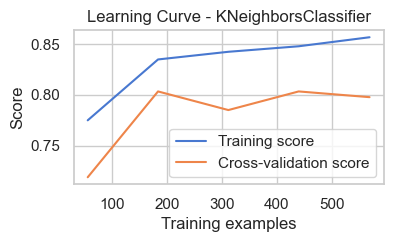

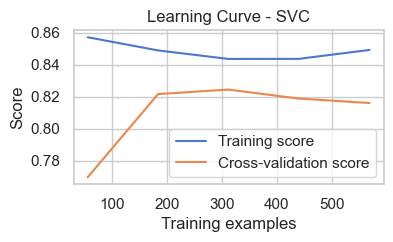

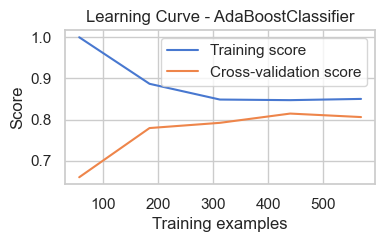

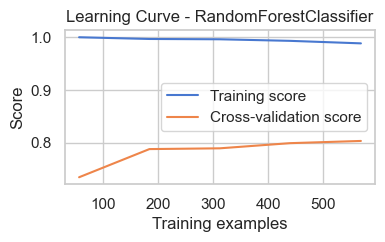

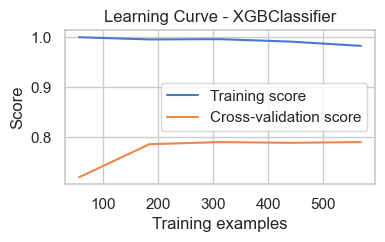

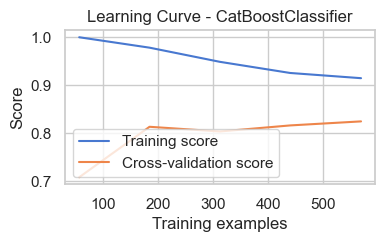

In [2129]:
# significant overfitting in most of the models, despite the good scores
# on training data

# plot_learning_curve(lr, X_train_scaled, y_train, fig_size=(4, 2))
plot_learning_curve(knn, X_train_scaled, y_train, fig_size=(4, 2))
plot_learning_curve(svc, X_train_scaled, y_train, fig_size=(4, 2))
# plot_learning_curve(nb, X_train, y_train, fig_size=(4, 2))
# plot_learning_curve(dt, X_train, y_train, fig_size=(4, 2))
plot_learning_curve(ada, X_train, y_train, fig_size=(4, 2))
plot_learning_curve(rf, X_train, y_train, fig_size=(4, 2))
plot_learning_curve(xgb, X_train, y_train, fig_size=(4, 2))
plot_learning_curve(cat, X_train, y_train, fig_size=(4, 2))

### Tune Models / Detect Overfitting & Underfitting
- Hyperparameters tunning
- Learning curve to check:
  - **Overfitting** (High Variance): The training score is high, but the validation score is significantly lower, indicating that the model fits the training data well but does not generalize to new data.
  - **Underfitting** (High Bias): Both training and validation scores are low, and they converge at a similar low score. This indicates that the model is too simple and does not capture the underlying patterns in the data.

### LogisticRegression

In [2130]:
# Logistic Regression

params = {
    "C": [0.01, 0.05, 0.1, 0.5, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 50],
    "max_iter": [1000, 1500, 2000, 2500, 3000],
    "penalty": ["l2"],
    "solver": ["lbfgs", "newton-cg", "sag"],
}

# Feature scaling to avoid ConvergenceWarning issue
evaluate_model_grid_search_cv(lr, X_train_scaled, y_train, params)

Model: LogisticRegression
 - Best accuracy: 82.59%
 - Best params: {'C': 9, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


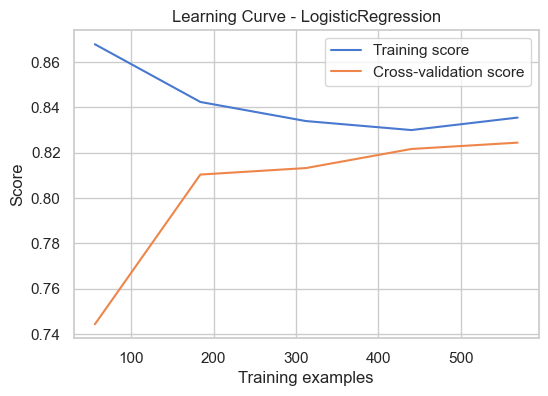

                            Train (k-fold)       Test (score)
Model                     Accuracy %   SD %       Accuracy %  
------------------------------------------------------------
LogisticRegression             82.45   4.50            81.01       


In [2131]:
# lr = fit_logistic_regression(X_train_scaled, y_train, 9, 1000, "l2", "lbfgs") # 82.5 train | 80.4 test | 77.5 final
lr = fit_logistic_regression(
    X_train=X_train_scaled,
    y_train=y_train,
    c=4,
    max_iter=1000,
    penalty="l2",
    solver="lbfgs",
)
plot_learning_curve(lr, X_train_scaled, y_train)
evaluate_train_vs_test_score([lr], *train_data, *test_data, models_to_scale)

### KNeighborsClassifier

In [2132]:
# KNN

params = {
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "leaf_size": [1, 2, 3, 4],
    "n_neighbors": [11, 12, 13],
    "p": [1.2, 1.3, 1.4],
    "weights": ["uniform", "distance"],
}

evaluate_model_grid_search_cv(knn, X_train_scaled, y_train, params)

Model: KNeighborsClassifier
 - Best accuracy: 82.30%
 - Best params: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 12, 'p': 1.3, 'weights': 'uniform'}


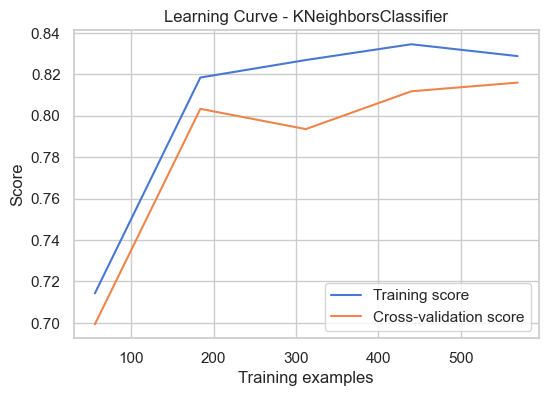

                            Train (k-fold)       Test (score)
Model                     Accuracy %   SD %       Accuracy %  
------------------------------------------------------------
KNeighborsClassifier           81.74   4.76            80.45       


In [2133]:
# knn = fit_knn(X_train_scaled, y_train, "auto", 1, 12, 1.3, "uniform") # 82.3 train | 81 test | 77.9 final
# knn = fit_knn(X_train_scaled, y_train, "auto", 1, 16, 1.3, "uniform") # 81.7 train | 80.4 test | 78.7 final
knn = fit_knn(
    X_train=X_train_scaled,
    y_train=y_train,
    algorithm="auto",
    leaf_size=1,
    n_neighbors=16,
    p=1.3,
    weights="uniform",
)
plot_learning_curve(knn, X_train_scaled, y_train)
evaluate_train_vs_test_score([knn], *train_data, *test_data, models_to_scale)

### SVC

In [2134]:
# SVC

params = {
    "C": [1.7, 1.8, 1.9],
    "degree": [1, 2, 3],
    "gamma": ["scale", "auto", 0.01, 0.05, 0.1],
    "kernel": ["rbf", "poly", "sigmoid"],
}

evaluate_model_grid_search_cv(svc, X_train_scaled, y_train, params)

Model: SVC
 - Best accuracy: 83.43%
 - Best params: {'C': 1.8, 'degree': 1, 'gamma': 0.05, 'kernel': 'rbf'}


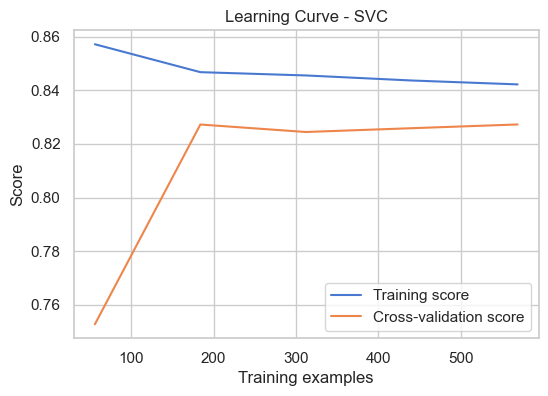

                            Train (k-fold)       Test (score)
Model                     Accuracy %   SD %       Accuracy %  
------------------------------------------------------------
SVC                            83.00   5.35            83.80       


In [2135]:
# svc = fit_svc(X_train_scaled, y_train, 1.8, 1, 0.05, "rbf") # 83.4 train | 83.8 test | 77.9 final
# svc = fit_svc(X_train_scaled, y_train, 1.5, 1, 0.03, "rbf") # 83.2 train | 83.2 test | 78.2 final
# svc = fit_svc(X_train_scaled, y_train, 2.8, 1, 0.06, "rbf") # 83.0 train | 83.8 test | 78.4 final
svc = fit_svc(
    X_train=X_train_scaled,
    y_train=y_train,
    c=2.8,
    degree=1,
    gamma=0.06,  # look for the value where the 2 lines move more in parallel, the earlier the better
    kernel="rbf",
)
plot_learning_curve(svc, X_train_scaled, y_train)
evaluate_train_vs_test_score([svc], *train_data, *test_data, models_to_scale)

### GaussianNB

In [2136]:
# Gaussian Naive Bayes

params = {"var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}

evaluate_model_grid_search_cv(nb, X_train, y_train, params)

Model: GaussianNB
 - Best accuracy: 80.34%
 - Best params: {'var_smoothing': 1e-05}


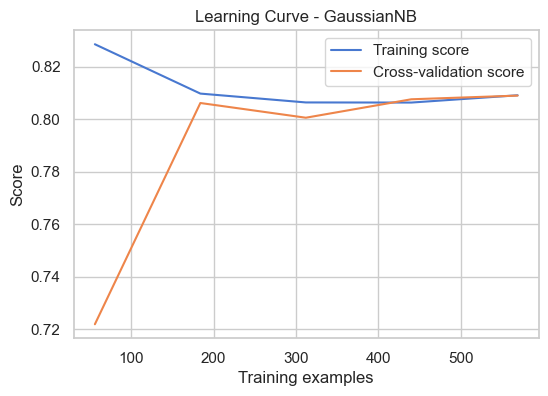

                            Train (k-fold)       Test (score)
Model                     Accuracy %   SD %       Accuracy %  
------------------------------------------------------------
GaussianNB                     80.34   5.13            78.21       


In [2137]:
nb = fit_nb(X_train, y_train, 1e-05)
plot_learning_curve(nb, X_train, y_train)
evaluate_train_vs_test_score([nb], *train_data, *test_data, models_to_scale)

### DecisionTreeClassifier

In [2138]:
# Decision Tree

params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [4, 5, 6],
    "max_features": ["sqrt", "log2", None, 0.5, 0.75],
    "max_leaf_nodes": [20, 22, 24],
    "min_samples_leaf": [5, 6, 7],
    "min_samples_split": [2, 3],
    "splitter": ["best", "random"],
}

evaluate_model_grid_search_cv(dt, X_train, y_train, params)

Model: DecisionTreeClassifier
 - Best accuracy: 84.55%
 - Best params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.75, 'max_leaf_nodes': 22, 'min_samples_leaf': 6, 'min_samples_split': 2, 'splitter': 'best'}


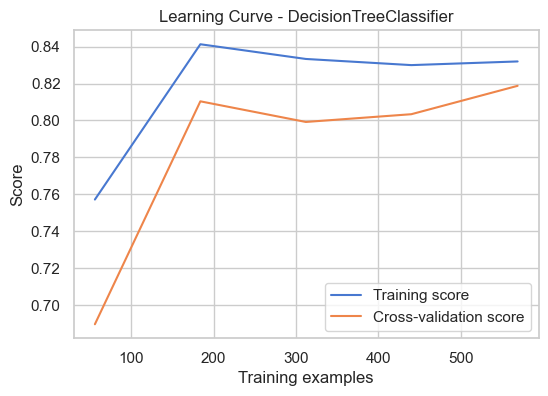

                            Train (k-fold)       Test (score)
Model                     Accuracy %   SD %       Accuracy %  
------------------------------------------------------------
DecisionTreeClassifier         82.16   3.44            79.33       


In [2139]:
"""
To reduce overfitting:
1) Prune the Tree:
- Limit the `max_depth` of the tree to reduce complexity.
- Increase `min_samples_split` to require more samples for a split.
- Increase `min_samples_leaf` to require more samples at a leaf node.
2) Use Fewer Features:
- Reduce `max_features` to limit the number of features considered for each split.
3) Regularize the Tree:
- Set `max_leaf_nodes` to constrain the number of leaf nodes.
- Use `ccp_alpha` to apply cost complexity pruning.
Ensemble Methods:
- Consider using an ensemble of decision trees like a Random Forest to average out predictions.
"""

# dt = fit_decision_tree(X_train, y_train, 0, "entropy", 5, 0.75, 22, 6, 2, "best") # 84.5 train | 78.7 test | 75.1 final
# dt = fit_decision_tree(X_train, y_train, 0, "entropy", 4, 0.75, 20, 8, 4, "best") # 83.1 train | 82.1 test | 77.5 final
# dt = fit_decision_tree(X_train, y_train, 0, "entropy", 4, 0.75, 20, 10, 4, "best") # 82.6 train | 79.3 test | 78.7 final
dt = fit_decision_tree(
    X_train=X_train,
    y_train=y_train,
    # if ccp_alpha=0.03, the lines get super aligned and train & test scores get higher, though
    # scores in the chart are a bit lower and final score is also lower :/
    ccp_alpha=0,
    criterion="entropy",
    max_depth=4,
    max_features=0.75,
    max_leaf_nodes=20,
    # only with min_samples_leaf=10, the lines get aligned as compared to any other value,
    # although the test score decreases a bit. It's more important the curve than a specific score!
    min_samples_leaf=10,
    min_samples_split=4,
    splitter="best",
)
plot_learning_curve(dt, X_train, y_train)
evaluate_train_vs_test_score([dt], *train_data, *test_data, models_to_scale)

### AdaBoostClassifier

In [2140]:
# Ada Boost

params = {
    "algorithm": ["SAMME", "SAMME.R"],
    "estimator": [DecisionTreeClassifier(max_depth=depth) for depth in [1, 2, 3]],
    "learning_rate": [0.7, 0.8, 0.9],
    "n_estimators": [200, 215, 220, 225, 230, 235],
}

evaluate_model_grid_search_cv(ada, X_train, y_train, params)

Model: AdaBoostClassifier
 - Best accuracy: 84.70%
 - Best params: {'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.8, 'n_estimators': 225}


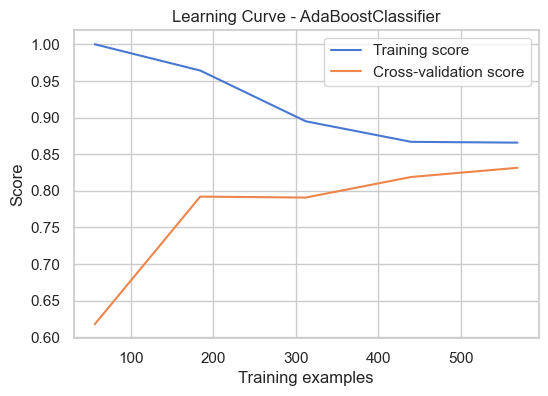

                            Train (k-fold)       Test (score)
Model                     Accuracy %   SD %       Accuracy %  
------------------------------------------------------------
AdaBoostClassifier             84.70   4.63            81.56       


In [2141]:
ada = fit_ada_boost(
    X_train, y_train, DecisionTreeClassifier(max_depth=2), "SAMME", 0.8, 225
)
plot_learning_curve(ada, X_train, y_train)
evaluate_train_vs_test_score([ada], *train_data, *test_data, models_to_scale)

### RandomForestClassifier

In [2142]:
# Random Forest

params = {
    "bootstrap": [True, False],
    "class_weight": [None],
    "criterion": ["gini", "entropy"],
    "max_depth": [9, 10],
    "max_features": ["sqrt", "log2", None],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 3],
    "n_estimators": [45, 50],
}

evaluate_model_grid_search_cv(rf, X_train, y_train, params)

Model: RandomForestClassifier
 - Best accuracy: 84.27%
 - Best params: {'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


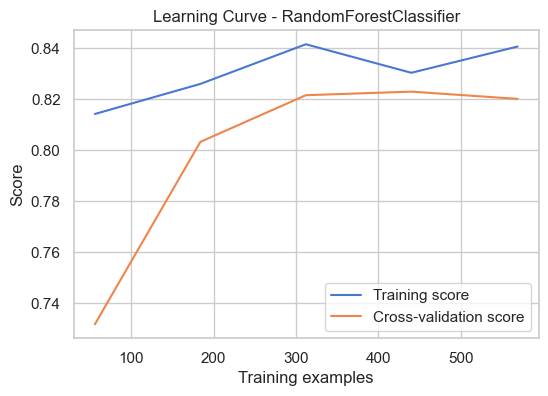

                            Train (k-fold)       Test (score)
Model                     Accuracy %   SD %       Accuracy %  
------------------------------------------------------------
RandomForestClassifier         82.02   4.91            81.56       


In [2143]:
"""
To reduce overfitting:
1) Increase Regularization:
- Increase min_samples_leaf: A split point at any depth will only be considered if it leaves at 
  least min_samples_leaf training samples in each of the left and right branches.
- Increase min_samples_split: Larger values prevent creating nodes that specialize too much on
  the training data.
2) Adjust Tree Complexity:
- Reduce max_depth: Try reducing max_depth to limit the complexity of the model.
- Use max_features: Smaller values can reduce overfitting by adding randomness to the model.
3) Model Ensemble:
- Use bootstrap=True: Bootstrapping introduces randomness into the model by training each tree on
  a different sample of the data.
- Adjust n_estimators: Sometimes, adding more estimators can improve generalization as it averages
  out predictions, but too many can increase training time without significant performance gains.
4) Other Parameters:
- Consider setting class_weight: If your classes are imbalanced, setting class_weight to 'balanced' might improve performance.
5) Prune Trees:
- Although RandomForest does not have built-in pruning, you can limit the max_leaf_nodes.
"""
# rf = fit_random_forest(
#     X_train, y_train, True, None, "entropy", 10, "sqrt", 2, 2, 50
# )  # 84.2 train | 82.1 test | 76.3 final
# rf = fit_random_forest(
#     X_train, y_train, True, None, "entropy", 7, "sqrt", 4, 2, 45
# )  # 82.3 train | 82.5 test | 78.4 final
# rf = fit_random_forest(
#     X_train, y_train, True, None, "gini", 4, "sqrt", 14, 14, 500
# )  # 81.7 train | 81.0 test | 78.4 final
# rf = fit_random_forest(
#     X_train, y_train, True, None, "gini", 5, "sqrt", 6, 6, 300
# )  # 82.0 train | 81.5 test | 78.9 final
rf = fit_random_forest(
    X_train=X_train,
    y_train=y_train,
    bootstrap=True,
    class_weight=None,
    criterion="gini",
    max_depth=5,
    max_features="sqrt",
    min_samples_leaf=6,
    min_samples_split=6,
    n_estimators=300,
)
plot_learning_curve(rf, X_train, y_train)
evaluate_train_vs_test_score([rf], *train_data, *test_data, models_to_scale)

### XGBClassifier

In [2144]:
# XGBoost

params = {
    "colsample_bytree": [0.6, 0.7],
    "gamma": [0.03, 0.04],
    "learning_rate": [0.3, 0.4],
    "max_depth": [5, 6, 7],
    "min_child_weight": [7, 8, 9],
    "n_estimators": [100, 125],
    "subsample": [0.7, 0.8],
}

evaluate_model_grid_search_cv(xgb, X_train, y_train, params)

Model: XGBClassifier
 - Best accuracy: 85.40%
 - Best params: {'colsample_bytree': 0.7, 'gamma': 0.04, 'learning_rate': 0.4, 'max_depth': 6, 'min_child_weight': 8, 'n_estimators': 100, 'subsample': 0.8}


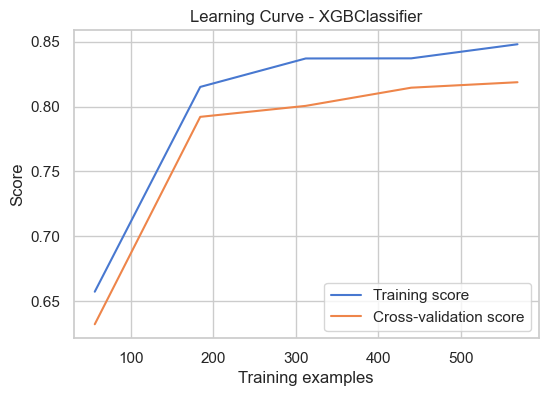

                            Train (k-fold)       Test (score)
Model                     Accuracy %   SD %       Accuracy %  
------------------------------------------------------------
XGBClassifier                  82.02   5.17            82.68       


In [2145]:
"""
To reduce overfitting:
1) Increase Regularization:
- A larger `gamma` makes the algorithm more conservative.
- Increase the `reg_lambda` and `reg_alpha` parameters to add L2 and L1 regularization on weights, respectively.
2) Control Complexity:
- Reduce the `max_depth` of the trees. Deeper trees can lead to overfitting, so try lowering this
  parameter to control model complexity.
- Increase the `min_child_weight` parameter. Higher values prevent the model from learning relations that might be
  highly specific to the particular sample selected for a tree.
3) Add Randomness:
- Lower the `subsample` parameter to use a smaller random subset of the data. This can make the model more robust 
  by introducing more randomness into the training.
- Lower the `colsample_bytree` parameter to use a smaller subset of features for each tree.
4) Reduce Learning Rate and Increase Estimators:
- Decrease the `learning_rate` and increase the `n_estimators` proportionally. A lower learning rate with more trees
  can often lead to a more generalized model.
5) Early Stopping:
- Implement early stopping to automatically stop training when the cross-validation score stops improving. This prevents
  the model from continuing to learn from noise in the training data.
6) Pruning Trees:
- XGBoost supports pruning of trees after they are grown. Ensure that this feature is enabled (which it is by default).
"""
# xgb = fit_xgboost(
#     X_train, y_train, 0.7, 0.04, 0.4, 6, 8, 100, 0.8
# )  # 85.4 train | 82.1 test | 76.5 final
# xgb = fit_xgboost(
#     X_train, y_train, 0.7, 0.2, 0.2, 6, 9, 32, 0.8
# )  # 82.0 train | 82.6 test | 79.9 final
xgb = fit_xgboost(
    X_train=X_train,
    y_train=y_train,
    colsample_bytree=0.7,
    gamma=0.2,
    learning_rate=0.2,
    max_depth=6,
    min_child_weight=9,
    n_estimators=32,
    subsample=0.8,
)

plot_learning_curve(xgb, X_train, y_train)
evaluate_train_vs_test_score([xgb], *train_data, *test_data, models_to_scale)

In [2146]:
# xgb = fit_xgboost_early_stop(X_train, y_train, X_test, y_test, 0.7, 0.04, 0.4, 6, 8, 100, 0.8, 10, True)

### CatBoostClassifier

In [2147]:
# CatBoost

params = {
    "bootstrap_type": ["Bernoulli"],
    "border_count": [128, 256],
    "depth": [2, 3, 4],
    "eval_metric": ["Logloss"],
    "iterations": [180, 200],
    "l2_leaf_reg": [6, 7, 8],
    "learning_rate": [0.15, 0.2, 0.25],
    "subsample": [0.95, 1],
}

evaluate_model_grid_search_cv(cat, X_train, y_train, params)

Model: CatBoostClassifier
 - Best accuracy: 84.83%
 - Best params: {'bootstrap_type': 'Bernoulli', 'border_count': 256, 'depth': 3, 'eval_metric': 'Logloss', 'iterations': 200, 'l2_leaf_reg': 7, 'learning_rate': 0.2, 'subsample': 1}


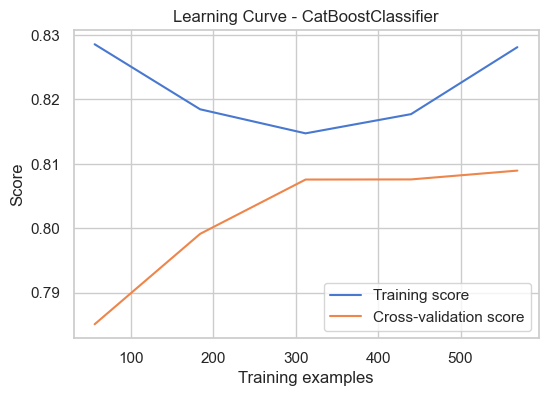

                            Train (k-fold)       Test (score)
Model                     Accuracy %   SD %       Accuracy %  
------------------------------------------------------------
CatBoostClassifier             81.32   5.66            82.12       


In [2148]:
"""
To reduce overfitting:
1) Increase Regularization (`l2_leaf_reg`): Higher regularization penalizes complexity and
   helps prevent the model from fitting the training data too closely.
2) Reduce Model Complexity (`depth`): Smaller trees are less complex and can improve the model's
   ability to generalize to unseen data by reducing overfitting.
3) Decrease Learning Rate (`learning_rate`): A smaller learning rate forces the model to make more
   conservative updates during training, which can lead to better generalization.
4) Implement Early Stopping (`early_stopping_rounds`): Utilize early stopping to cease training when
   the validation score stops improving, which prevents overfitting by not allowing the model to
   continue learning noise in the training data.
5) Adjust Bin Count (`border_count`): This parameter dictates the number of splits for numerical
   features and a smaller number can lead to a less complex model.
6) Limit Iterations (`iterations`): Can prevent the model from becoming too fitted to the training data.
7) Bootstrap and Subsampling (`bootstrap_type`, `subsample`): For Bernoulli bootstrapping, adjusting the
   subsample parameter can introduce more randomness into the training process, which may help in
   reducing overfitting.
8) Model Calibration: Once the model is trained, calibrate it on a validation set to improve the
   reliability of the probability predictions.
9) Post-Pruning (model_shrink_rate, model_shrink_mode): After training, use model shrinking in CatBoost
   to prune unnecessary trees, which can reduce the complexity of the model and help to mitigate overfitting.
"""
# cat = fit_catboost(
#     X_train, y_train, "Bernoulli", 256, 3, "Logloss", 200, 7, 0.2, 1
# )  # 84.3 train vs. 82.68 test vs. 75.3 final
# cat = fit_catboost(
#     X_train, y_train, "Bernoulli", 256, 2, "Logloss", 100, 7, 0.15, 1
# )  # 83.1 train vs. 81.0 test vs. 78.2 final
# cat = fit_catboost(
#     X_train, y_train, "Bernoulli", 256, 7, "Logloss", 220, 100, 0.0025, 0.8
# )  # 81.3 train vs. 82.1 test vs. 79.4 final
cat = fit_catboost(
    X_train=X_train,
    y_train=y_train,
    bootstrap_type="Bernoulli",
    border_count=256,
    depth=7,
    eval_metric="Logloss",
    iterations=220,
    l2_leaf_reg=100,
    learning_rate=0.0025,
    subsample=0.8,
)
plot_learning_curve(cat, X_train, y_train)
evaluate_train_vs_test_score([cat], *train_data, *test_data, models_to_scale)

### Summary of all Models with tunned parameters

When detecting overfitting, "simplifying the model" or "reduce complexity" refers to reducing its capacity to memorize the training data, which is often achieved by lowering the number of parameters or the model's flexibility.

In [2149]:
# Summary
models = [lr, knn, svc, nb, dt, ada, rf, xgb, cat]
evaluate_train_vs_test_score(models, *train_data, *test_data, models_to_scale)

                            Train (k-fold)       Test (score)
Model                     Accuracy %   SD %       Accuracy %  
------------------------------------------------------------
AdaBoostClassifier             84.70   4.63            81.56       
SVC                            83.00   5.35            83.80       
LogisticRegression             82.45   4.50            81.01       
DecisionTreeClassifier         82.16   3.44            79.33       
RandomForestClassifier         82.02   4.91            81.56       
XGBClassifier                  82.02   5.17            82.68       
KNeighborsClassifier           81.74   4.76            80.45       
CatBoostClassifier             81.32   5.66            82.12       
GaussianNB                     80.34   5.13            78.21       


### Kaggle check
*evaluate model scores with Kaggle's test data (incl. 'Survival' field)* 😎

In [2150]:
# TODO: all this could be done together with train file

df_test_result = pd.read_csv("./data/test_leaked.csv")
df_submission = df_test_result.copy()

# update null values on Fares based on Pclass
mean_fares = df_test_result.groupby("Pclass")["Fare"].transform("mean")
df_test_result["Fare"] = df_test_result["Fare"].fillna(mean_fares)

# update null values on Age based on Pclass
mean_age = df_test_result.groupby("Pclass")["Age"].transform("mean")
df_test_result["Age"] = df_test_result["Age"].fillna(mean_age)

# add new categories
df_test_result["AgeGroup"] = df_test_result["Age"].apply(categorize_age)
df_test_result["Title"] = df_test_result["Name"].str.extract(
    " ([A-Za-z]+)\.", expand=False
)
df_test_result["Title"] = df_test_result.apply(replace_titles, axis=1)

df_test_result["Title"].unique()

# remove unnecessary fields
df_test_result = df_test_result.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

# encode categorical data
dummies = pd.get_dummies(df_test_result[categorical_fields], drop_first=False)
df_test_result = pd.concat(
    [df_test_result.drop(categorical_fields, axis=1), dummies], axis=1
)

# no split needed
X_test_result = df_test_result.drop("Survived", axis=1)
y_test_result = df_test_result["Survived"]

# scaling
X_test_result_scaled = X_test_result.copy()
X_test_result_scaled[fields_to_scale] = sc.fit_transform(X_test_result[fields_to_scale])

In [2154]:
# evaluate models with big unseen dataset
models = [lr, knn, svc, nb, dt, ada, rf, xgb, cat]
# models = [rf]
evaluate_test_score(
    models, X_test_result, X_test_result_scaled, y_test_result, models_to_scale
)

Model                     Accuracy %  
XGBClassifier             79.90       
CatBoostClassifier        79.43       
RandomForestClassifier    78.95       
KNeighborsClassifier      78.71       
DecisionTreeClassifier    78.71       
SVC                       78.47       
LogisticRegression        77.51       
AdaBoostClassifier        76.79       
GaussianNB                76.08       


### Kaggle submission

In [2152]:
def generate_submission(model, file_name):
    submission = pd.DataFrame(
        {
            "PassengerId": df_submission["PassengerId"],
            "Survived": model.predict(X_test_result),
        }
    )
    submission.to_csv(f"./data/submission_{file_name}.csv", index=False)
    return submission

In [2153]:
# v1 XGBoost -> 79.9%
submission = generate_submission(xgb, 'v1_xgb')
submission.tail(5)

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0
